<a href="https://colab.research.google.com/github/joshuareyesc/MetNumUN2023I/blob/main/joreyes_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U fortran-magic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.1 MB/s eta 0:00:00


In [ ]:
%reload_ext fortranmagic

/usr/local/lib/python3.8/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 103 µs, sys: 0 ns, total: 103 µs
Wall time: 143 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    A_c = len(A[0])
    B_r = len(B)
    if(A_c!=B_r):
       print("Error por tamaños")
    else:
       rows_out = len(A)
       cols_out = len(B[0])
       out = [[0 for col in range(cols_out)] for row in range(rows_out)]
       for i in range(rows_out):
           for j in range(cols_out):
               for k in range(len(A[0])):
                   out[i][j] += A[i][k] * B[k][j]
       return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
matmul (a,b)

Error por tamaños


**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
x = [[7, 3],
     [3, 2],
     [9, 1],
     [2, 7]]

y = [[1, 2, 3, 4],
     [2, 3, 4, 5]]
matmul(x, y)

[[13, 23, 33, 43], [7, 12, 17, 22], [11, 21, 31, 41], [16, 25, 34, 43]]

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
matmul(a,b)


Error por tamaños


**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [ ]:
from random import *
m = [[randint(1,10) for j in range(4)] for i in range(5)]
n = [[randint(1,10) for j in range(5)] for i in range(6)]
print(m)
print(n)


[[9, 1, 3, 1], [1, 10, 3, 10], [2, 5, 5, 3], [5, 9, 6, 5], [2, 8, 2, 8]]
[[3, 6, 1, 3, 8], [7, 10, 1, 8, 7], [2, 6, 6, 7, 2], [8, 4, 6, 2, 8], [3, 2, 7, 8, 5], [9, 1, 6, 6, 6]]


**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
import time

matmul(a, b)

Error por tamaños


In [ ]:
#random.normalvariate(0,1)

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out
    matmul()

randm = random_matrix(2, 3)
randm

[[0.3557128859944878, 0.018672336549445, 0.7719736963481493],
 [0.016067411935804854, 0.7885147431028504, 0.3626963886449438]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
%%time

start_time = time.time()

B = [[randint(1,10) for j in range(100)] for i in range(600)]
A = [[randint(1,10) for j in range(600)] for i in range(100)]

for i in range(10):
  matmul(A,B)

import time
idx = 10
t_average = 0
for i in range(idx):
  ini = time.process_time()
  out = matmul(A,B)
  fin = time.process_time()
  #print(fin - ini)
  t_average += fin - ini
#print(t_average/10)

t_Python =(time.time() - start_time)
t_Python=t_Python/10
t_Python


CPU times: user 39.5 s, sys: 93.2 ms, total: 39.6 s
Wall time: 48.2 s


4.821986413002014

**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
import pandas as pd

avrge_exec_t= pd.DataFrame()
avrge_exec_t['lenguaje de programacion']=None
avrge_exec_t['Tiempo']=None
avrge_exec_t.loc[len(avrge_exec_t.index)] = ["python",t_Python]
avrge_exec_t


lenguaje de programacion    Tiempo
0                   python  4.821986

**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
#%%time

start_time = time.time()

npA = np.array(A)
npB = np.array(B)
t_average = 0
for i in range(idx):
  ini = time.process_time()
  npC = npA@npB
  fin = time.process_time()
  t_average += fin-ini
#print(t_average/10)

t_NumPy =(time.time() - start_time)
t_NumPy=t_NumPy/10
t_NumPy

avrge_exec_t.loc[len(avrge_exec_t.index)] = ["numPy",t_NumPy]
avrge_exec_t

lenguaje de programacion    Tiempo
0                   python  4.821986
1                    numPy  0.008527

In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)
#lis.append(10.1/10)

CPU times: user 11.5 s, sys: 46 ms, total: 11.5 s
Wall time: 11.6 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 52.2 ms, sys: 0 ns, total: 52.2 ms
Wall time: 52.8 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 242 µs, sys: 0 ns, total: 242 µs
Wall time: 250 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:
A = [[-1, 10],
    [0,5]]

B = [[4, -7],
     [3, 5]]


**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
%%fortran

subroutine matmul(A,B,N,L,M,R)
  implicit none
  integer, intent(in) :: N,L,M
  double precision, intent(in)::A(2,*)
  double precision, intent(in)::B(2,*)
  double precision, intent(out)::R(N,M)
  integer I,J,K,aux
  do I=1,n
    do J=1,M
      R(I,J)=0
      do K=1,L
        R(I,J)=R(I,J)+A(I,K)*B(K,J)
      end do
    end do
  end do
end


**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
M1=np.array(random_matrix(2,2))
M2=np.array(random_matrix(2,2))

rows_out=len(M1)
cols_out=len(M2[0])
N=rows_out
L=len(M1[0])
M=cols_out
matmul(M1,M2,N,L,M)

array([[0.63776904, 0.64110984],
       [1.47380084, 1.48161283]])

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
%%fortran

subroutine matmul(A,B,N,L,M,R)
  implicit none
  integer, intent(in) :: N,L,M
  double precision, intent(in)::A(600,*)
  double precision, intent(in)::B(100,*)
  double precision, intent(out)::R(N,M)
  integer I,J,K,aux
  do I=1,n
    do J=1,M
      R(I,J)=0
      do K=1,L
        R(I,J)=R(I,J)+A(I,K)*B(K,J)
      end do
    end do
  end do
end

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
%%time
M1=np.array(random_matrix(600,100))
M2=np.array(random_matrix(100,600))

rows_out=len(M1)
cols_out=len(M2[0])
N=rows_out
L=len(M1[0])
M=cols_out
matmul(M1,M2,N,L,M)
#lis.append((161/1000)/10)

CPU times: user 68.8 ms, sys: 4.95 ms, total: 73.7 ms
Wall time: 76.6 ms


array([[26.97073351, 25.07284857, 25.62561663, ..., 25.2769485 ,
        24.93381991, 28.54126567],
       [25.73081417, 22.98557854, 24.46122467, ..., 23.98299406,
        24.22423929, 26.41136753],
       [25.95095085, 25.37867738, 24.77515491, ..., 23.98460698,
        24.72772492, 27.59874131],
       ...,
       [25.95909031, 26.24559992, 24.34952722, ..., 24.24708715,
        24.23238238, 27.18550284],
       [28.98333882, 27.17762899, 29.49519482, ..., 27.99008905,
        28.89162464, 29.61217471],
       [24.04000772, 25.28683657, 26.47329302, ..., 24.08336962,
        25.46086667, 25.50522153]])

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
%%time
M1=np.array(random_matrix(600,100))
M2=np.array(random_matrix(100,600))

rows_out=len(M1)
cols_out=len(M2[0])
N=rows_out
L=len(M1[0])
M=cols_out

start_time = time.time()
for x in range(10):
  matmul(M1,M2,N,L,M)

t_fortran_magic =(time.time() - start_time)
t_fortran_magic=t_fortran_magic/10
t_fortran_magic


avrge_exec_t.loc[len(avrge_exec_t.index)] = ["Fortran magic",t_fortran_magic]
avrge_exec_t

CPU times: user 478 ms, sys: 13 ms, total: 491 ms
Wall time: 498 ms


lenguaje de programacion    Tiempo
0                   python  4.821986
1                    numPy  0.008527
2            Fortran magic  0.046826

**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%time
%%fortran

subroutine matmulx10(A,B,N,L,M,R)
  implicit none
  integer, intent(in) :: N,L,M
  double precision, intent(in)::A(600,*)
  double precision, intent(in)::B(100,*)
  double precision, intent(out)::R(N,M)
  integer Y,I,J,K,aux
  do Y=1,10
    do I=1,n
      do J=1,M
        R(I,J)=0
        do K=1,L
          R(I,J)=R(I,J)+A(I,K)*B(K,J)
        end do
      end do
    end do
  end do
end

CPU times: user 15.2 ms, sys: 18 ms, total: 33.2 ms
Wall time: 1.15 s


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%time
A1=np.array(random_matrix(600,100))
B1=np.array(random_matrix(100,600))

rows_out=len(A1)
cols_out=len(B1[0])
N=rows_out
L=len(A1[0])
M=cols_out
matmulx10(A1,B1,N,L,M)
#lis.append((589/1000)/10)

CPU times: user 464 ms, sys: 2.05 ms, total: 467 ms
Wall time: 471 ms


array([[22.52484424, 25.63215871, 21.42259984, ..., 25.51413694,
        27.22782716, 22.76718457],
       [21.54271772, 25.90970017, 21.64149167, ..., 24.3545349 ,
        25.77575635, 24.08569213],
       [21.13816322, 24.90806402, 20.38367926, ..., 23.43746101,
        25.64470556, 22.87145356],
       ...,
       [23.92397766, 27.9612928 , 23.47446055, ..., 26.62383463,
        29.73993763, 26.48012147],
       [23.65014878, 25.2602376 , 23.47538944, ..., 23.27237207,
        26.84886744, 21.88999282],
       [21.80954513, 25.49219964, 21.18866864, ..., 24.55399002,
        28.24292533, 22.61684414]])

**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
t_fortran=t_fortran_magic
t_fortran

avrge_exec_t.loc[len(avrge_exec_t.index)] = ["Fortran",t_fortran]
avrge_exec_t

lenguaje de programacion    Tiempo
0                   python  4.821986
1                    numPy  0.008527
2            Fortran magic  0.046826
3                  Fortran  0.046826

**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile tmpc.c
#include <stdlib.h>
#include <stdio.h>

int main() {
	unsigned short i, j, k;
  int matrizA[600][100];
  int matrizB[100][600];
  int matrizFinal[600][600];

    for(i = 0; i < 600;i++) {
    	for(j = 0; j < 100;j++) {
    		matrizA[i][j]=rand()%100;
    	}
    }
    for(i = 0; i < 100;i++) {
    	for(j = 0; j < 600;j++) {
    		matrizB[i][j]=rand()%100;
    	}
    }
    
    for(i=0;i<600;i++)
    {
        for(j=0;j<600;j++)
        {
            matrizFinal[i][j]=0;
            for(k=0;k<600;k++)
            {
                matrizFinal[i][j]+=matrizA[i][k]*matrizB[k][j];
            }
            printf("%d\t", matrizFinal[i][j]);
        }
        printf("\n");
    }
 
  return 0;
}

Overwriting tmpc.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%time
start_time=time.time()
!gcc tmpc.c -o tmpc
!./tmpc
t_C =(time.time() - start_time)
t_C=t_C/10
t_C

27270336	26206464	25356480	23772960	29290368	24224544	28112064	25809984	25108704	25704288	24216384	24959712	26967552	23309664	23763168	24078048	23890656	20144544	25051584	25942176	24489696	20440032	24809856	26241408	23889024	24578592	23722848	24937536	27416160	24083616	24532128	22312416	22280736	21773472	25943040	25612416	26880000	26881536	22069344	23785920	20420544	24699072	28223136	26542560	23515296	25923264	25234272	24121440	26049888	23620128	24900000	24161664	26169216	21640512	22854240	22608192	25708320	22376448	25737888	24051456	26187840	26967264	22662144	25360224	24253824	24597792	26342880	26198976	25205856	25373664	25471680	23848608	28987968	25670784	25733088	25694880	23345664	23137920	25742880	24704064	24864096	21629088	24430080	24690240	24983616	23961216	24263520	23205888	22830432	21607008	23543328	22300416	25226208	26289120	26330208	27690912	23649984	25186944	22590816	23545824	27656832	24565056	26518464	23613696	24004128	24664992	24610080	24302976	23481024	23537280	26064672	2

1.9201717138290406

**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
avrge_exec_t.loc[len(avrge_exec_t.index)] = ["C",t_C]
#lis.append(19.4/10)
avrge_exec_t


lenguaje de programacion    Tiempo
0                   python  4.821986
1                    numPy  0.008527
2            Fortran magic  0.046826
3                  Fortran  0.046826
4                        C  1.920172

**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile tmpcc.cc

#include <stdlib.h>
#include <iostream>
#include <time.h>

using namespace std;

void multiply(int mat1[600][100],int mat2[100][600]){
    int i, j, k,c=0;
    while(c>10){
      for (i = 0; i < 600; i++) {
        for (j = 0; j < 600; j++) {
            mat1[i][j] = 0;
            for (k = 0; k < 100; k++)
                mat1[i][j] += mat1[i][k] * mat2[k][j];
        }
        c++;
      }
    }
    for (i = 0; i < 600; i++)
        {
            for (j = 0; j < 100; j++)
            {
                cout<<"\t"<<mat1[i][j];
            }
            cout<<"\n\n";
        }
}

int main(void) {
  int A[600][100];
  int B[100][600];

  for (int i = 0; i < 600; i++){
    for (int j = 0; j < 100; j++){
      A[i][j] = rand()%15;
    }
  }

  for (int i = 0; i < 100; i++){
    for (int j = 0; j < 600; j++){
      B[i][j] = rand()%15;
    }
  }
	multiply(A, B);
	return 0;
}



Overwriting tmpcc.cc


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%time

%%writefile tmpcc.cc

#include <stdlib.h>
#include <iostream>
#include <time.h>

using namespace std;




int main(void) {
  int A[600][100];
  int B[100][600];

  for (int i = 0; i < 600; i++){
    for (int j = 0; j < 100; j++){
      A[i][j] = rand()%15;
    }
  }

  for (int i = 0; i < 100; i++){
    for (int j = 0; j < 600; j++){
      B[i][j] = rand()%15;
    }
  }
	multiply(A, B);
	return 0;
}


Overwriting tmpcc.cc
CPU times: user 1.61 ms, sys: 11 µs, total: 1.62 ms
Wall time: 4.99 ms


**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:
avrge_exec_t.loc[len(avrge_exec_t.index)]=['C++',(2.36/1000)/10]
tCpp=(2.36/1000)/10
#lis.append((2.36/1000)/10)
avrge_exec_t

lenguaje de programacion    Tiempo
0                   python  4.821986
1                    numPy  0.008527
2            Fortran magic  0.046826
3                  Fortran  0.046826
4                        C  1.920172
5                      C++  0.000236

**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile Main.Java

int c =0;
while(c<10) {
		for (int i=0; i < m2[0].length; i++) {
			
			 for (int j=0; j < m1.length; j++) {
				 for(int k =0;k<m2.length; k++) {
					 v =v + m1[j][k]*m2[k][i];	 
				 }
				 m3[j][i]= v;
				 v=0;
			  }
			 
			}
		 
		c++;
		
	}

Overwriting Main.Java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:

%%time
%%writefile Main.java



int c = 0;
		int [][] m1;
		m1 = new int[600][100];
		int [][]m2;
		m2 = new int[100][600];
		int x = 0;
		int v =0;
		int[][]m3 = new int[m1.length][m2[0].length];
		
		for (x=0; x < (m1.length); x++) {
			  for (int y=0; y < (m1[x].length); y++) {
			    m1[x][y] = (int) (Math.random()*9+1);
			  }
			}

		for (x=0; x < (m2.length); x++) {
			  for (int y=0; y < (m2[x].length); y++) {
			    m2[x][y] = (int) (Math.random()*9+1);
			  }
			}

	while(c<10) {
		for (int i=0; i < m2[0].length; i++) {
			
			 for (int j=0; j < m1.length; j++) {
				 for(int k =0;k<m2.length; k++) {
					 v =v + m1[j][k]*m2[k][i];	 
				 }
				 m3[j][i]= v;
				 v=0;
			  }
			 
			}
		 
		c++;
		
	}



Overwriting Main.java
CPU times: user 635 µs, sys: 993 µs, total: 1.63 ms
Wall time: 4.76 ms


**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
avrge_exec_t.loc[len(avrge_exec_t.index)]=['Java',(8.84/1000)/10]
tJava=(8.84/1000)/10
#lis.append((8.84/1000)/10)
avrge_exec_t

lenguaje de programacion    Tiempo
0                   python  4.821986
1                    numPy  0.008527
2            Fortran magic  0.046826
3                  Fortran  0.046826
4                        C  1.920172
5                      C++  0.000236
6                     Java  0.000884

**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:

%%writefile tmp.js
let multiplicacion = new Array(m1.length);
for(e=0;e<10;e++){
for (k=0; k<multiplicacion.length;k++){
    multiplicacion[k] = new Array(m2[0].length).fill(0);

    for (n=0; n < multiplicacion.length; n++) {
        for (l=0; l < multiplicacion[n].length; l++) {                                
            for (d=0; d<m1[0].length; d++) {
                multiplicacion [n][l] = multiplicacion [n][l] + m1[n][d]*m2[d][l]; 
            }
        }
    }
}
}

Overwriting tmp.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:

%%time
%%writefile tmp.js

let m1 = new Array(600);
let m2 =new Array(100);

for (i=0; i<m1.length;i++){
    m1[i] = new Array(100);
}
    for (u=0; u < m1.length; u++) {
        for (w=0; w < m1[u].length; w++) {                                
            m1[u][w]= Math.random();
        }
    }

for (a=0; a<m2.length;a++){
    m2[a] = new Array(600);
}
    for (r=0; r< m2.length; r++) {
        for (c=0; c < m2[r].length; c++) {                                
            m2[r][c]= Math.random();
        }
    }





let multiplicacion = new Array(m1.length);
for(e=0;e<10;e++){
for (k=0; k<multiplicacion.length;k++){
    multiplicacion[k] = new Array(m2[0].length).fill(0);

    for (n=0; n < multiplicacion.length; n++) {
        for (l=0; l < multiplicacion[n].length; l++) {                                
            for (d=0; d<m1[0].length; d++) {
                multiplicacion [n][l] = multiplicacion [n][l] + m1[n][d]*m2[d][l]; 
            }
        }
    }
}
}


Overwriting tmp.js
CPU times: user 2.42 ms, sys: 0 ns, total: 2.42 ms
Wall time: 2.54 ms


**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:
avrge_exec_t.loc[len(avrge_exec_t.index)]=['JavaScript',(2.8/1000)/10]
tJS=(2.8/1000)/10
#lis.append((2.8/1000)/10)
avrge_exec_t

lenguaje de programacion    Tiempo
0                   python  4.821986
1                    numPy  0.008527
2            Fortran magic  0.046826
3                  Fortran  0.046826
4                        C  1.920172
5                      C++  0.000236
6                     Java  0.000884
7               JavaScript  0.000280

**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [ ]:


#lisn = ["Python","Numpy","Fortran","Fortranmagic","C++","Java","Javascript","C"]
#dfr = pd.DataFrame()
#dfr["lenguajes"]=lisn
#dfr["tiempo"]=lis
#dfr.min()
avrge_exec_t.min()

lenguaje de programacion           C
Tiempo                      0.000236
dtype: object

**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
avrge_exec_t['Speed Factor']=[float(t_Python/avrge_exec_t.min(numeric_only=True)),float(t_NumPy/avrge_exec_t.min(numeric_only=True)),float(t_fortran_magic/avrge_exec_t.min(numeric_only=True)),float(t_fortran/avrge_exec_t.min(numeric_only=True)),float(t_C/avrge_exec_t.min(numeric_only=True)),float(tCpp/avrge_exec_t.min(numeric_only=True))
,float(tJava/avrge_exec_t.min(numeric_only=True)),float(tJS/avrge_exec_t.min(numeric_only=True))]

avrge_exec_t

lenguaje de programacion    Tiempo  Speed Factor
0                   python  4.821986  20432.145818
1                    numPy  0.008527     36.129608
2            Fortran magic  0.046826    198.417296
3                  Fortran  0.046826    198.417296
4                        C  1.920172   8136.320821
5                      C++  0.000236      1.000000
6                     Java  0.000884      3.745763
7               JavaScript  0.000280      1.186441

**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
#dfr.sort_values("tiempo",ascending=False)
avrge_exec_t.sort_values(['Speed Factor'])

lenguaje de programacion    Tiempo  Speed Factor
5                      C++  0.000236      1.000000
7               JavaScript  0.000280      1.186441
6                     Java  0.000884      3.745763
1                    numPy  0.008527     36.129608
2            Fortran magic  0.046826    198.417296
3                  Fortran  0.046826    198.417296
4                        C  1.920172   8136.320821
0                   python  4.821986  20432.145818

## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

In [ ]:
data + data

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

In [ ]:
# Binary operators.
data * data

In [ ]:
# Unary functions.
np.sqrt(data)

In [ ]:
# Comparison operations
(data % 3) == 0

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

In [ ]:
sines[:3]  # First three elements  

In [ ]:
sines[5:]  # Elements from 5 on.

In [ ]:
sines[::2]  # Every other element.

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

In [ ]:
unsorted_data[sort_indices]

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

In [ ]:
data[:2, :2]  # First two rows and first two columns.

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

In [ ]:
data.mean()

In [ ]:
data.mean(axis=0)

In [ ]:
data.mean(axis=1)

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

In [ ]:
row + column

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

In [ ]:
# ... or by label.
s.loc['a']

In [ ]:
# Slicing works as expected...
s.iloc[:2]

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

In [ ]:
# As does boolean masking.
s.loc[s > 2]

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

In [ ]:
s + other_s

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
#from demos.avocados import read_avocadata

#avocados = read_avocadata('2014', '2016')
#avocados.head()

In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));
print(organic_spread_by_region(hass).head())

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [ ]:
#!/usr/bin/env python
!pip install pandas
!pip install sodapy
import pandas as pd
from sodapy import Socrata
client = Socrata("www.datos.gov.co", None)
results = client.get("u56b-h56z", limit=2704)
results_df = pd.DataFrame.from_records(results)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1


In [ ]:
print(results_df.dtypes)
results_df['valor_precio'] = results_df['valor_precio'].astype(float, errors = 'raise')
print(results_df.dtypes)
results_df.head()
dacon=results_df.sort_values(['municipio'])
dacon.head()


fecha_precio             object
anio                     object
mes                      object
dia                      object
departamento             object
municipio                object
codigo_municipio_dane    object
producto                 object
valor_precio             object
dtype: object
fecha_precio              object
anio                      object
mes                       object
dia                       object
departamento              object
municipio                 object
codigo_municipio_dane     object
producto                  object
valor_precio             float64
dtype: object


fecha_precio  anio mes dia        departamento municipio  \
2455  02 Feb 2023  2023   2   2  NORTE DE SANTANDER    ABREGO   
117   04 Feb 2023  2023   2   4  NORTE DE SANTANDER    ABREGO   
1679  20 Feb 2023  2023   2  20  NORTE DE SANTANDER    ABREGO   
1159  25 Feb 2023  2023   2  25  NORTE DE SANTANDER    ABREGO   
2553  08 Feb 2023  2023   2   8  NORTE DE SANTANDER    ABREGO   

     codigo_municipio_dane            producto  valor_precio  
2455                 54003                ACPM        7520.0  
117                  54003  GASOLINA CORRIENTE        9200.0  
1679                 54003  GASOLINA CORRIENTE       10700.0  
1159                 54003  GASOLINA CORRIENTE       10190.0  
2553                 54003  GASOLINA CORRIENTE        9200.0

fecha_precio  anio mes dia        departamento municipio  \
117   04 Feb 2023  2023   2   4  NORTE DE SANTANDER    ABREGO   
1679  20 Feb 2023  2023   2  20  NORTE DE SANTANDER    ABREGO   
1159  25 Feb 2023  2023   2  25  NORTE DE SANTANDER    ABREGO   
2553  08 Feb 2023  2023   2   8  NORTE DE SANTANDER    ABREGO   
853   02 Feb 2023  2023   2   2                META   ACACIAS   

     codigo_municipio_dane            producto  valor_precio  
117                  54003  GASOLINA CORRIENTE        9200.0  
1679                 54003  GASOLINA CORRIENTE       10700.0  
1159                 54003  GASOLINA CORRIENTE       10190.0  
2553                 54003  GASOLINA CORRIENTE        9200.0  
853                  50006  GASOLINA CORRIENTE       10873.0

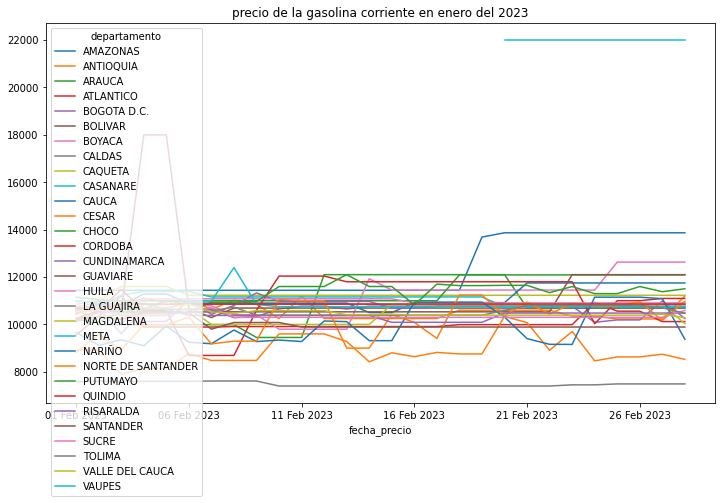

In [ ]:
gaso = dacon[(dacon.producto == 'GASOLINA CORRIENTE')]
gaso.groupby(['fecha_precio', 'departamento'])['valor_precio'].mean().unstack().ffill().plot( ).set_title("precio de la gasolina corriente en enero del 2023");
gaso.head()
ga = gaso.sort_values(['municipio'])
ga.head()


fecha_precio  anio mes dia departamento  municipio codigo_municipio_dane  \
1897  02 Feb 2023  2023   2   2         META    ACACIAS                 50006   
1121  06 Feb 2023  2023   2   6         META    ACACIAS                 50006   
1667  06 Feb 2023  2023   2   6         META    ACACIAS                 50006   
2608  20 Feb 2023  2023   2  20        CESAR  AGUACHICA                 20011   
2661  04 Feb 2023  2023   2   4        CESAR  AGUACHICA                 20011   

            producto  valor_precio  
1897  GASOLINA EXTRA       19770.0  
1121  GASOLINA EXTRA       19399.0  
1667  GASOLINA EXTRA       20220.0  
2608  GASOLINA EXTRA       19350.0  
2661  GASOLINA EXTRA        8650.0

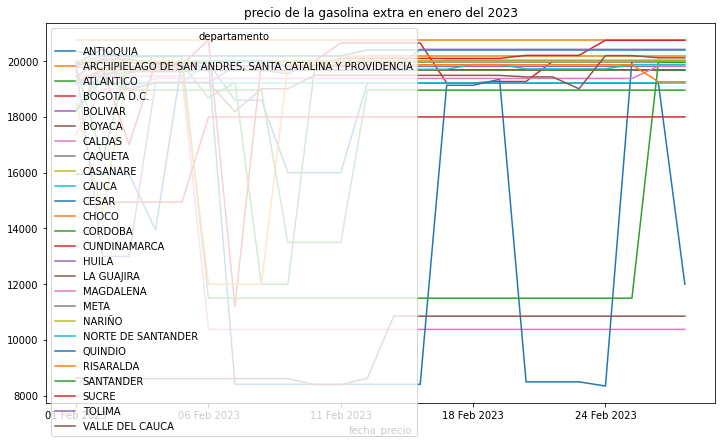

In [ ]:
gase = dacon[(dacon.producto == 'GASOLINA EXTRA')]
gase.groupby(['fecha_precio', 'departamento'])['valor_precio'].mean().unstack().ffill().plot().set_title("precio de la gasolina extra en enero del 2023");
gase.head()

In [ ]:
ac = dacon[(dacon.producto == 'ACPM')]
ac.groupby(['fecha_precio', 'departamento'])['valor_precio'].mean().unstack().ffill().plot().set_title("precio del ACPM en enero del 2023");
ac.head()


In [ ]:
dat = gaso.set_index('departamento')
dat1 =dat.drop(['producto'], axis =1)
dat2=dat1.rename(columns={'departamento':'departamento','fecha_precio':'fecha_precio','anio':'año','mes':'mes','dia':'dia','municipio':'municipio','codigo_municipio_dane':'codigo_municipio_dane','valor_precio':'PRECIO_GASOLINA_CORRIENTE'})
dat3 = dat2.sort_values(['municipio'])

dato = ac.set_index('departamento')
dato.head()
dato1 =dato.drop(['producto'], axis =1)
dato1.head()
dato2=dato1.rename(columns={'departamento':'departamento','fecha_precio':'fecha_precio','anio':'año','mes':'mes','dia':'dia','municipio':'municipio','codigo_municipio_dane':'codigo_municipio_dane','valor_precio':'precio_acpm'})
dato2.head()
dato3 = dato2.sort_values(['municipio'])

dati = gase.set_index('departamento')
dati1 =dati.drop(['producto'], axis =1)
dati2=dati1.rename(columns={'departamento':'departamento','fecha_precio':'fecha_precio','anio':'año','mes':'mes','dia':'dia','municipio':'municipio','codigo_municipio_dane':'codigo_municipio_dane','valor_precio':'precio_gasolina_extra'})
dati3 = dati2.sort_values(['municipio'])
d = dato3['precio_acpm'].tolist()
d1 = dati3['precio_gasolina_extra'].tolist()

def adlist(t,r,w):
  for i in range(t+1):
   if(i>r):
     w.append(0)

adlist(len(dat3),len(d),d)
adlist(len(dat3),len(d1),d1)  
dat3['PRECIO_ACPM'] = d
dat3['PRECIO_GASOLINA_EXTRA'] = d1
corre = dat3.corr()
dat3.head()
  


In [ ]:
import seaborn as sns
grid = sns.clustermap(corre, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!